# 二次元配列と勾配問題
## 【問題1】1次関数
---
x

が-50から50の範囲で次の式を考えます。

$y=\frac{1}{2}x+1$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [28]:
import numpy as np

# arange関数はSTOP値が含まれないので、0.1間隔値を足す必要がある
x = np.arange(-50, 50+0.1, 0.1)
print(x.shape, x)

y = 1/2*x + 1
print(y.shape, y)


(1001,) [-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
(1001,) [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


##【問題2】配列の結合
---
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [18]:
xy = np.vstack([x, y]).T
print(xy.shape)
print(xy[:10])

(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 [-49.7  -23.85]
 [-49.6  -23.8 ]
 [-49.5  -23.75]
 [-49.4  -23.7 ]
 [-49.3  -23.65]
 [-49.2  -23.6 ]
 [-49.1  -23.55]]


## 【問題3】勾配を求める
---
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [19]:
# yの変化量
d_y = y[1:]-y[:-1]
print(d_y.shape, d_y[:10])

# xの変化量
d_x = x[1:]-x[:-1]
print(d_x.shape, d_x[:10])

# 勾配
gradient = d_y / d_x
print(gradient.shape, gradient[:10])

(1000,) [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
(1000,) [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
(1000,) [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


## 【問題4】グラフを描く
---
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

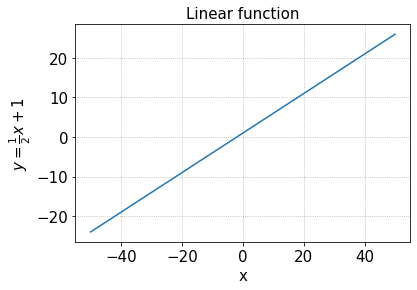

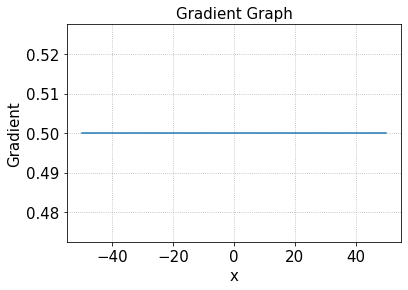

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1次関数のグラフを表示
plt.xlabel("x", fontsize=15)
plt.ylabel('$y=\\frac{1}{2}x+1$', fontsize=15)
plt.title("Linear function", fontsize=15)
plt.tick_params(labelsize=15)
plt.plot(x, y)
plt.grid(linestyle = "dotted")
plt.show()


# 勾配グラフを表示
plt.xlabel("x", fontsize=15)
plt.ylabel("Gradient", fontsize=15)
plt.title("Gradient Graph", fontsize=15)
plt.tick_params(labelsize=15)
plt.plot(x[1:], gradient)  # 要素の数を合わせるためにXデータを１つ少なくする
plt.grid(linestyle = "dotted")
plt.show()


## 【問題5】Pythonの関数化
---
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。

そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$y=x^2(−50≤x≤50)$   
$y=2x^2+2^x(−50≤x≤50)$  
$y=sin(x^\frac{1}{2})(0≤x≤50)$  

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには<font color="red">np.sin()</font>を用います。

In [21]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    array_x = np.arange(x_range[0], x_range[1], x_range[2])
    array_y = function(array_x)
    array_xy = np.vstack([array_x, array_y]).T

    # yの変化量
    d_y = array_y[1:]-array_y[:-1]
 
    # xの変化量
    d_x = array_x[1:]-array_x[:-1]
 
    # 勾配
    gradient = d_y / d_x

    return array_xy, gradient

def function1(array_x):
    array_y = array_x**2
    return array_y

def function2(array_x):
    array_y = 2 * array_x**2 + 2**array_x
    return array_y

def function3(array_x):
    array_y = np.sin(array_x**0.5)
    return array_y



In [22]:
def show_gradient_graph(array_xy, gradient, str_ylabel):
  '''
  関数式と勾配のグラフを描画する

  Parameters
  --------------
  array_xy : ndarray型
    0列はxの配列、1列はyの配列データ
  gradient：ndarray型    
    勾配データ
  str_ylabel : string型
    Y軸のラベル名

  Returns
  --------------
  なし
  '''
  import matplotlib.pyplot as plt
  %matplotlib inline

  # 1次関数のグラフを表示
  plt.xlabel("x", fontsize=15)
  # plt.ylabel('$y=\\frac{1}{2}x+1$', fontsize=15)
  plt.ylabel(str_ylabel, fontsize=15)
  plt.title("Linear function", fontsize=15)
  plt.tick_params(labelsize=15)
  plt.plot(array_xy[:, 0], array_xy[:, 1])
  plt.grid(linestyle = "dotted")
  plt.show()


  # 勾配グラフを表示
  plt.xlabel("x", fontsize=15)
  plt.ylabel("Gradient", fontsize=15)
  plt.title("Gradient Graph", fontsize=15)
  plt.tick_params(labelsize=15)
  plt.plot(array_xy[1:, 0], gradient)  # 要素の数を合わせるためにXデータを１つ少なくする
  plt.grid(linestyle = "dotted")
  plt.show()

### 上記の3式をグラフ表示する

[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 [ -49.7  2470.09]
 [ -49.6  2460.16]
 [ -49.5  2450.25]
 [ -49.4  2440.36]
 [ -49.3  2430.49]
 [ -49.2  2420.64]
 [ -49.1  2410.81]] (1001, 2)
[-99.9 -99.7 -99.5 -99.3 -99.1 -98.9 -98.7 -98.5 -98.3 -98.1] (1000,)


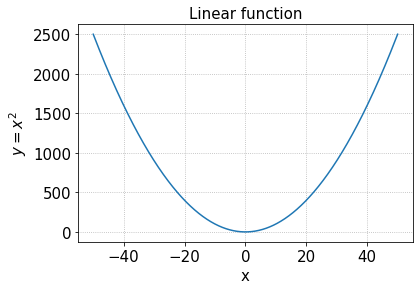

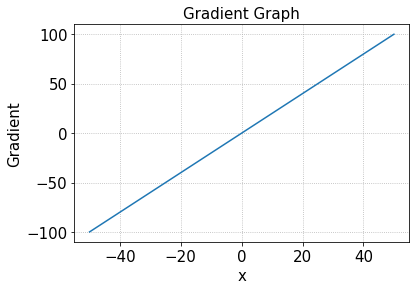

In [23]:
# 式1: y = x^2
array_xy, gradient = compute_gradient(function1)

print(array_xy[:10], array_xy.shape)
print(gradient[:10], gradient.shape)

show_gradient_graph(array_xy, gradient, '$y=x^2$')

[[ -50.   5000.  ]
 [ -49.9  4980.02]
 [ -49.8  4960.08]
 [ -49.7  4940.18]
 [ -49.6  4920.32]
 [ -49.5  4900.5 ]
 [ -49.4  4880.72]
 [ -49.3  4860.98]
 [ -49.2  4841.28]
 [ -49.1  4821.62]] (1001, 2)
[-199.8 -199.4 -199.  -198.6 -198.2 -197.8 -197.4 -197.  -196.6 -196.2] (1000,)


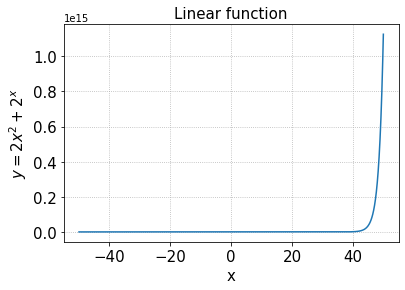

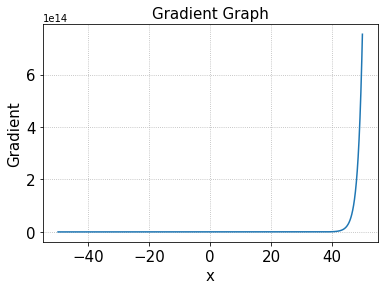

In [24]:
# 式2: y = 2*x^2 + 2^x
array_xy, gradient = compute_gradient(function2)

print(array_xy[:10], array_xy.shape)
print(gradient[:10], gradient.shape)

show_gradient_graph(array_xy, gradient, '$y=2x^2+2^x$')

[[0.         0.        ]
 [0.1        0.31098359]
 [0.2        0.43245484]
 [0.3        0.5207443 ]
 [0.4        0.59112712]
 [0.5        0.64963694]
 [0.6        0.69942787]
 [0.7        0.74240966]
 [0.8        0.77985065]
 [0.9        0.8126489 ]] (501, 2)
[3.10983593 1.21471246 0.88289461 0.70382818 0.58509822 0.49790931
 0.42981792 0.37440988 0.32798246 0.28822088] (500,)


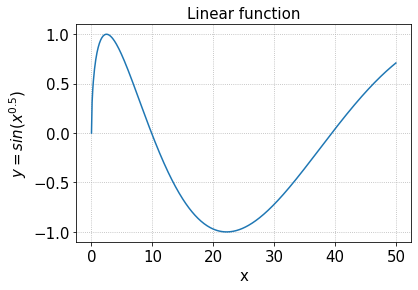

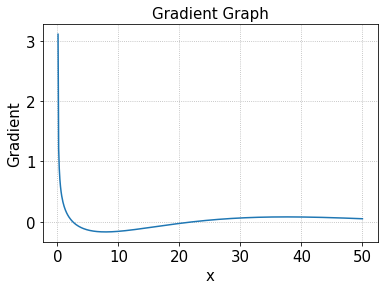

In [25]:
# 式3: y = sin(x^0.5)
array_xy, gradient = compute_gradient(function3, x_range=(0, 50.1, 0.1))

print(array_xy[:10], array_xy.shape)
print(gradient[:10], gradient.shape)

show_gradient_graph(array_xy, gradient, '$y=sin(x^{0.5})$')

##【問題6】最小値を求める
---
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。

In [26]:
# yの最小値

# 式1: y = x^2
array_xy_1, gradient = compute_gradient(function1)
print("数式1 yの最小値：{}".format(array_xy_1[:, 1].min()))
print("数式1 最小値のインデックス：{}".format(array_xy_1[:, 1].argmin()))

# 式2: y = 2*x^2 + 2^x
array_xy_2, gradient = compute_gradient(function2)
print("数式2 yの最小値：{}".format(array_xy_2[:, 1].min()))
print("数式2 最小値のインデックス：{}".format(array_xy_2[:, 1].argmin()))

# 式3: y = sin(x^0.5)
array_xy_3, gradient = compute_gradient(function3, x_range=(0, 50.1, 0.1))
print("数式3 yの最小値：{}".format(array_xy_3[:, 1].min()))
print("数式3 最小値のインデックス：{}".format(array_xy_3[:, 1].argmin()))

数式1 yの最小値：5.048709793414476e-25
数式1 最小値のインデックス：500
数式2 yの最小値：0.9505505632959851
数式2 最小値のインデックス：498
数式3 yの最小値：-0.9999997540298113
数式3 最小値のインデックス：222
